In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split


In [3]:
#Wrangling----------------------------------------------------------------------------------------------------------------------

In [4]:
#1Merge datasets

# Load the datasets
customer_profiles = pd.read_csv("customer_profiles.csv")
ad_events = pd.read_csv("ad_events.csv")

# Merge the datasets on the 'id' and 'customer' columns using left join
merged_data = pd.merge(customer_profiles, ad_events, left_on='id', right_on='customer', how='left')

# For non-matching rows, fill in NaN values with the corresponding 'id' or 'customer' value
merged_data['customer'].fillna(merged_data['id'], inplace=True)
merged_data['id'].fillna(merged_data['customer'], inplace=True)


dfO=merged_data


In [5]:
#2 Split data into testing and training
#df0=dfO
#--------------------------------------------------------------------------------------------------------------------------


# Assuming dfO is your original dataframe
train_df, test_df = train_test_split(dfO, test_size=0.3, random_state=42)

# train_df will contain 70% of the data
# test_df will contain 30% of the data

In [6]:
#len(train_df)

In [7]:
#split numerical parts of dataframe
df = pd.DataFrame((((train_df.drop('id', axis=1)).drop('home_state', axis=1)).drop('event', axis=1)).drop('event_info', axis=1))

# Make float dataset
df1 = {}

# Extract year, month, and day from "became_member_on (year month day)"
df1["year"] = df["became_member_on (year month day)"].apply(lambda x: float(str(x)[:4]) if pd.notnull(x) and len(str(x)) == 10 else 0)
df1["month"] = df["became_member_on (year month day)"].apply(lambda x: float(str(x)[4:6]) if pd.notnull(x) and len(str(x)) == 10 else 0)
df1["day"] = df["became_member_on (year month day)"].apply(lambda x: float(str(x)[6:8]) if pd.notnull(x) and len(str(x)) == 10 else 0)

# Other columns
df1["gender"] = df["gender"].map({'F': 0.0, 'M': 1.0}).fillna(0.5790270890798996)
df1["ever_married"] = df["ever_married"].map({'No': 0.0, 'Yes': 1.0}).fillna(0.5247599943435656)
df1["time"] = df["time"].apply(lambda x: float(x) if pd.notnull(x) else 366.6747497813369)
df1["age"] = df["age"].apply(lambda x: float(x) if pd.notnull(x) else 53.81169310700612)
df1["income"] = df["income"].apply(lambda x: float(x) if pd.notnull(x) else 64304.72993144192)
df1["kids"] = df["kids"].apply(lambda x: float(x) if pd.notnull(x) else 1.692206166561045)

# Create a new DataFrame
df = (pd.DataFrame(df1))
print((df["gender"]).mean())

0.5790270890798996


In [ ]:
#df.info()
df.head()

In [ ]:
#KMeans--------------------------------------------------------------------------------------------------------------------

In [9]:
#1get data
#df = pd.read_csv("demo.csv")
df.describe()

,year,month,day,gender,ever_married,time,age,income,kids
count,190933.0,190933.0,190933.0,190933.000000,190933.000000,190933.000000,190933.000000,190933.000000,190933.000000
mean,0.0,0.0,0.0,0.579027,0.524760,366.674750,53.811693,64304.729931,1.692206
std,0.0,0.0,0.0,0.490114,0.499388,200.309509,17.558611,21230.653930,1.472091
min,0.0,0.0,0.0,0.000000,0.000000,0.000000,18.000000,30000.000000,0.000000
25%,0.0,0.0,0.0,0.000000,0.000000,186.000000,41.000000,48000.000000,0.000000
50%,0.0,0.0,0.0,1.000000,1.000000,408.000000,55.000000,62000.000000,2.000000
75%,0.0,0.0,0.0,1.000000,1.000000,528.000000,66.000000,77000.000000,3.000000
max,0.0,0.0,0.0,1.000000,1.000000,714.000000,101.000000,120000.000000,5.000000


In [10]:
# Import stuff needed
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.cluster import KMeans

In [11]:
#Scale down data
scaled_df = pd.DataFrame(scaler.fit_transform(df))

In [15]:
#make inertias stuff
inertias = []

for cluster in range(1,20):
    kmeans = KMeans(n_clusters=cluster)
    kmeans.fit(scaled_df)
    inertias.append(kmeans.inertia_)
    print("Inertia",cluster,"is Done")

Inertia 1 is Done
Inertia 2 is Done
Inertia 3 is Done
Inertia 4 is Done
Inertia 5 is Done
Inertia 6 is Done
Inertia 7 is Done
Inertia 8 is Done
Inertia 9 is Done
Inertia 10 is Done
Inertia 11 is Done
Inertia 12 is Done
Inertia 13 is Done
Inertia 14 is Done
Inertia 15 is Done
Inertia 16 is Done
Inertia 17 is Done
Inertia 18 is Done
Inertia 19 is Done


In [19]:
#Make dataframe from different inertias
#frame = pd.DataFrame({"Clusters":range(1,20), "Inertias": inertias})
print(inertias)

[1145598.0000000002, 944620.4879980213, 833189.835514712, 757105.1372175596, 701855.599524803, 660766.065844349, 621175.7966590136, 589652.0870446172, 559541.0175728451, 533721.9416400897, 508608.22558248695, 489322.65078762406, 469758.50736622914, 454183.61242478795, 438751.60391558724, 423218.6507657984, 410516.37791395595, 398070.2037032597, 389019.64862946374]


<AxesSubplot:xlabel='Clusters', ylabel='Inertias'>

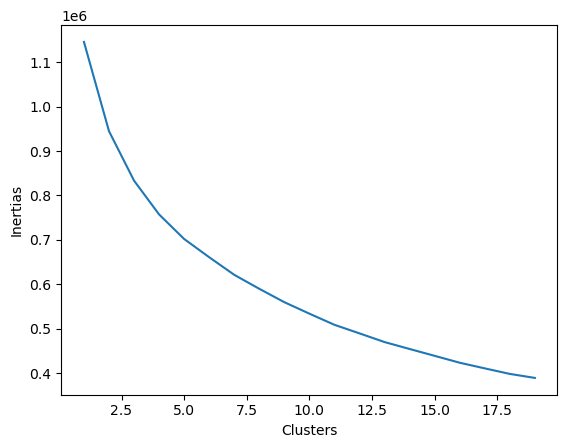

In [17]:
#3 View it

import seaborn as sns
sns.lineplot(data=frame, x="Clusters", y="Inertias")

In [18]:
#
kmeans = KMeans(n_clusters=6)
kmeans.fit(scaled_df)
predictions = kmeans.predict(scaled_df)

#get the centers
centers = kmeans.cluster_centers_
unscaled_centers = scaler.inverse_transform(centers)

In [ ]:
finalinertias=[1145598.0000000002, 944620.4879980213, 833189.835514712, 757105.1372175596, 701855.599524803, 660766.065844349, 621175.7966590136, 589652.0870446172, 559541.0175728451, 533721.9416400897, 508608.22558248695, 489322.65078762406, 469758.50736622914, 454183.61242478795, 438751.60391558724, 423218.6507657984, 410516.37791395595, 398070.2037032597, 389019.64862946374]